In [4]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [164]:
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64 
VALIDATION_STEPS = 25
BATCH_SIZE = 32
EPOCHS = 25
STEPS_PER_EPOCH = 100

In [139]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [140]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [141]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

In [142]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [143]:
training_set = train_datagen.flow_from_directory('data/training_set',
                                                 target_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'binary')

Found 253 images belonging to 2 classes.


In [144]:
training_set.class_indices

{'matheus': 0, 'naiara': 1}

In [145]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [146]:
test_set = test_datagen.flow_from_directory('data/test_set',
                                            target_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'binary')

Found 84 images belonging to 2 classes.


In [147]:
classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set.filenames) // BATCH_SIZE, #STEPS_PER_EPOCH,
                         epochs = EPOCHS,
                         validation_data = test_set,
                         validation_steps = VALIDATION_STEPS)

Epoch 1/25
7/7 [==============================] - 23s 3s/step - loss: 0.6959 - acc: 0.5223 - val_loss: 0.6902 - val_acc: 0.5710
Epoch 2/25
7/7 [==============================] - 20s 3s/step - loss: 0.6621 - acc: 0.6317 - val_loss: 0.8275 - val_acc: 0.5057
Epoch 3/25
7/7 [==============================] - 18s 3s/step - loss: 0.6368 - acc: 0.6325 - val_loss: 0.7082 - val_acc: 0.5173
Epoch 4/25
7/7 [==============================] - 19s 3s/step - loss: 0.6672 - acc: 0.5951 - val_loss: 0.7112 - val_acc: 0.5227
Epoch 5/25
7/7 [==============================] - 19s 3s/step - loss: 0.5953 - acc: 0.6748 - val_loss: 0.6748 - val_acc: 0.5497
Epoch 6/25
7/7 [==============================] - 19s 3s/step - loss: 0.5203 - acc: 0.7602 - val_loss: 0.7719 - val_acc: 0.5723
Epoch 7/25
7/7 [==============================] - 19s 3s/step - loss: 0.5095 - acc: 0.7504 - val_loss: 0.7084 - val_acc: 0.5824
Epoch 8/25
7/7 [==============================] - 19s 3s/step - loss: 0.4805 - acc: 0.8016 - val_loss: 0

In [148]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
__________

In [149]:
classifier.evaluate_generator(generator=test_set, steps=validation_steps)

[0.7573973588171722, 0.7225433532902271]

In [162]:
loss, metric = classifier.evaluate_generator(generator=test_set, steps=validation_steps)

In [163]:
print('loss:', loss)
print('acc:', metric)

loss: 0.7477634489874948
acc: 0.7315340898931026


In [154]:
test = image.load_img('./data/single_prediction/matheus-naiara-05.jpg', target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))

In [155]:
test = image.img_to_array(test)
test = np.expand_dims(test, axis=0)

In [156]:
classes = classifier.predict_classes(test)

In [157]:
classes

array([[0]], dtype=int32)

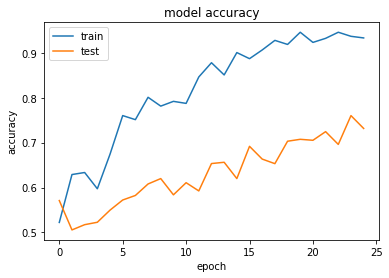

In [160]:
# summarize history for accuracy
plt.plot(classifier.history.history['acc'])
plt.plot(classifier.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

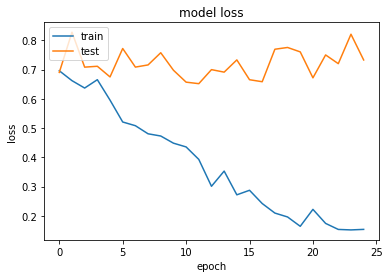

In [161]:
# summarize history for loss
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()